<a href="https://colab.research.google.com/github/mrshubhamjha/CODSOFT_titanic_prediction/blob/main/titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#load data from csv to pandas df
titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
#no of rows and columns
titanic_data.shape

(418, 12)

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
titanic_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [15]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [16]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [17]:
print(titanic_data['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [18]:
print(titanic_data['Fare'].mode()[0])

7.75


In [20]:
#replace missing value in Fare column with mode value
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0], inplace=True)

In [21]:
#no missing value
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
#get statistical measures about data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
#finding number of people survived and not survived
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

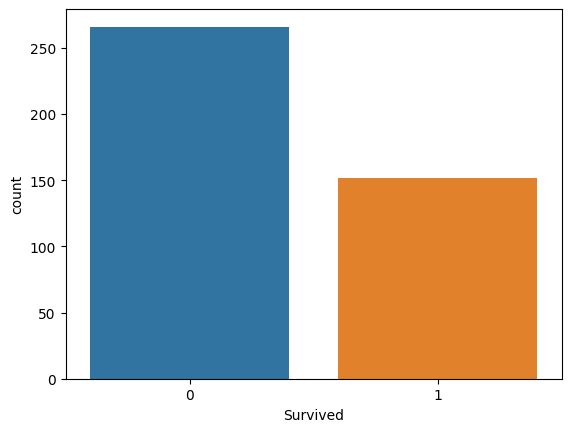

In [26]:
#data visualization
sns.countplot(x='Survived', data=titanic_data)

In [28]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

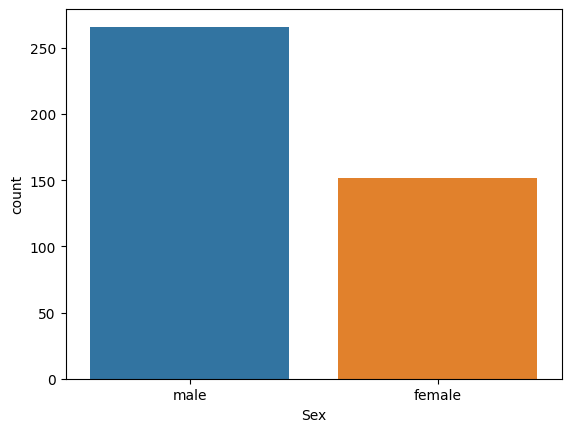

In [27]:
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

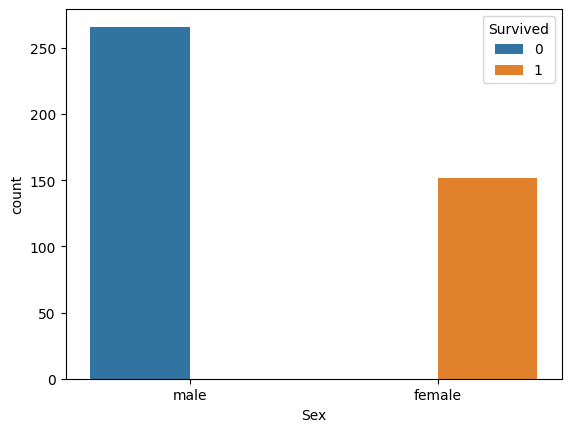

In [33]:
#no of survivors gender wise
sns.countplot(x='Sex', hue='Survived', data = titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

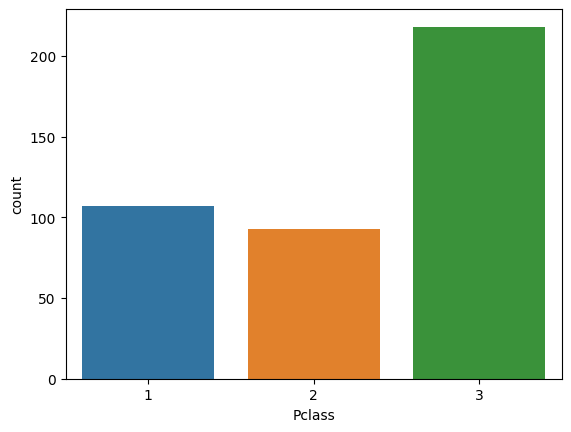

In [35]:
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

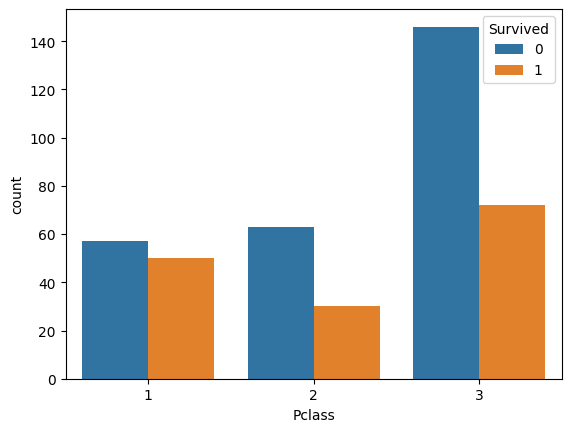

In [36]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

In [37]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [38]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [41]:
titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [42]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [43]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [44]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [45]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [46]:
#splitting into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [50]:
#model training
#logistic regression
model = LogisticRegression()

In [51]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
#accuracy score
X_train_prediction = model.predict(X_train)

In [53]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [55]:
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data: ', training_data_accuracy)

Accuracy score of training data:  1.0


In [58]:
#accuracy score on test data
X_test_prediction = model.predict(X_test)

In [59]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [60]:
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of test data: ', training_data_accuracy)

Accuracy score of test data:  1.0
